In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 
import os

I used this notebook to check different slim outputs and if it was generating what I was expecting

In [1]:
phenotypes1 = '2.1802 3.0572 1.4954 3.336 2.865 2.865 1.968 2.6246 2.7292 1.839 1.9188 1.3236 0.9756 2.78 1.968 1.9188 1.9188 1.3312 2.5907 2.6246 1.839 2.7156 2.6506 2.6506 2.6246 2.6246 2.6506 1.8878 1.8878 0.7954 1.9664 2.6246 2.1802 1.9188 1.9188 2.78 1.9188 2.6246 1.839 2.1802 1.9188 1.968 2.6704 2.1802 2.6246 1.4954 2.1802 2.6246 2.6246 2.6246 2.6246 2.6246 2.6246 2.7292 1.9664 1.839 1.9664 1.9664 1.9664 1.9664 1.9664 1.9664 3.071 1.968 2.1802 1.839 1.4954 1.839 1.839 1.839 1.839 0.8308 1.4954 1.968 1.839 2.1802 1.968 2.6704 1.8878 2.6704 1.968 1.968 1.968 1.839 1.7071 3.0012 1.968 1.9188 1.8878 1.8878 1.4954 1.4954 1.4954 1.8878 1.9664 1.968 1.3236 1.3236 1.839 2.78 0.8308 1.9664 0.8308 2.78 1.9188 2.78 1.9188 0.8308 0.8308 1.968 1.968 1.839 1.839 1.9188 1.968 1.968 1.9664 2.9562 1.968 2.7292 2.7292 2.7292 2.6246 3.298 1.839 1.839 1.9188 1.968 1.839 1.3236 2.6246 1.839 1.8878 1.4954 1.4954 1.4954 2.9562 2.1802 1.8878 1.8878 2.6704 2.6246 1.968 1.3236 1.3236 1.968 2.9562 1.9188 1.968 2.9562 1.968 1.968 2.6246 1.968 1.9664 2.1802 1.968 2.6246 1.4954 2.4537 2.8589 3.0572 1.968 3.3424 3.3424 2.6704 3.0506 1.9664 3.0506 0.6796 1.3312 1.3312 1.3312 1.968 1.3312 1.968 1.8878 2.7292 2.6246 1.9188 1.839 1.9188 2.9886 1.9188 1.9188 1.9188 1.968 2.1802 1.839 2.1802 1.3236 2.1802 1.968 1.839 1.968 2.6246 2.6246 3.0012 2.1802 1.9664 2.7292 2.6246 1.9188 1.8878 1.968 1.9664 1.9664 1.9188 1.9664 1.9188 1.9664 2.6246 2.6246 2.6246 1.8878 1.839 1.839 3.298 1.839 2.7292 1.839 1.839 1.9188 1.839 2.1802 1.9664 1.968 1.839 1.968 2.7156 1.8878 1.4954 1.839 1.3236 1.8878 1.9188 1.9188 1.9434 1.8878 2.6246 1.839 2.1802 2.3478 1.9188 1.839 1.3236 1.3236 1.839 2.9886 1.3236 1.968 1.839 1.968 2.78 0.8308 2.78 1.839 1.968 1.9188 1.968 1.839 1.839 1.968 2.7156 1.9188 1.968 1.9188 1.9188 1.839 1.839 2.7292 1.968 1.839 1.968 0.8308 1.839 1.8878 1.968 1.968 1.9664 2.7153 1.839 3.0054 1.4954 2.1802 1.968 1.3236 1.9188 1.839 1.9188 1.9188 2.1802 1.8878 2.6246 1.839 2.9562 2.1399 1.839 1.9664 1.968 2.6246 2.1802 1.9664 2.7292 1.968 1.968 1.968 1.9188 1.968 2.6246 2.9562 2.6246 2.1802 2.7156 1.8878 2.7292 2.6246 2.6246 3.0572 1.968 3.0572 2.9562 3.0572 2.6246 2.6246 1.9664 3.0572 2.1802 3.0572 3.0572 3.667 3.3424 3.3424 2.9886 3.3424 1.8878 1.839 2.865 1.968 1.839 2.865 2.865 2.865 2.865 2.865 2.6246 2.1802 2.9562 2.7448 1.8878 3.0506 3.0506 2.7156 3.0506 1.968 1.968 3.0506 2.1802 1.9188 1.9188 1.968 1.4954 1.4954 1.4954 2.9562 2.6704 1.8878 1.8878 2.6246 1.8878 0.8308 1.9664 2.6246 1.3236 1.9188 0.9756 2.6246 1.9664 1.3312 1.3312 1.839 2.7904 2.6246 1.3312 1.968 1.3312 1.9188 1.968 1.8878 1.8878 1.3312 1.968 1.4954 1.4954 1.968 1.839 1.8878 1.3312 2.1802 1.3312 2.1802 1.4954 3.0012 0.8308 3.0012 1.9188 1.3312 1.968 1.3312 1.968 1.3312 1.8878 2.1802 1.3312 1.3312 1.8878 1.3312 1.3312 1.3236 1.3312 1.9664 1.9664 1.9188 1.3312 1.3312 1.4954 1.839 3.0012 2.7292 1.839 2.1802 3.298 2.3085 2.6506 2.6506 1.968 2.6506 1.3236 2.6704 1.968 1.8878 1.839 1.3236 1.9188 2.6506 1.9188 1.968 1.968 2.6506 1.9188 2.1802 1.968 2.7156 2.1802 2.7156 2.6506 1.968 2.6246 1.9266 2.1802 1.839 3.0012 0.503 2.124 1.4307 1.3236 2.6246 2.9886 1.4954 2.9886 1.9188 0.8308 2.9886 2.9886 2.6704 1.3236 1.4954 2.6704 2.6246 0.7954 0.7954 1.4954 1.839 1.9188 1.4954 2.6246 1.8878 1.9188 1.9188 1.9188 2.9562 1.4954 1.9188 1.9188 2.7156 1.839 1.839 3.0012 2.1802 1.9188'

In [87]:
fitness1 = '0.0611814 0.272952 4.76506e-06 4.03865e-10 1.4362e-05 0.00336466 3.40932e-13 0.187754 0.988869 0.403323 1.94601e-05 2.72283e-09 1.26884e-05 1.37246e-29 1.02104e-05 3.02179e-05 0.000303194 1.8587e-08 0.0162167 0.00112592 2.76916e-09 1.09602e-09 0.43672 2.4294e-12 0.00336466 3.54612e-14 0.599846 0.00152668 0.000389283 0.00704441 9.81413e-12 0.000189664 0.000122892 0.00497147 0.597874 0.00419164 0.0611814 0.127041 0.1159 4.97974e-06 1.52766e-09 0.16957 0.278208 8.29376e-17 7.37098e-05 1.94065e-19 9.41249e-21 0.00161855 0.000820642 0.000131028 0.22403 1.57665e-05 0.0209596 0.00419164 0.0014604 0.183275 2.4294e-12 0.384016 5.55024e-08 7.87792e-05 0.119655 1.26884e-05 0.0226654 0.00152668 0.724411 0.82013 0.00979444 0.041683 1.13033e-24 1.02104e-05 0.00704441 0.000303194 7.12926e-05 0.00013581 0.996051 1.31379e-07 4.97974e-06 0.278208 0.599846 8.14344e-06 2.27724e-11 2.39818e-10 0.988532 0.881342 3.91374e-06 0.000131028 1.71874e-05 1.2501e-14 1.64923e-06 0.403323 0.00318608 2.84964e-11 0.599846 1.40186e-06 5.05334e-06 5.29866e-07 0.00161855 0.712762 0.164299 4.00603e-05 0.00292589 2.76916e-09 1.09602e-09 1.64923e-06 0.183275 0.00629278 0.00880179 0.988869 0.0350331 0.0296179 2.00857e-08 1.13033e-24 0.0186777 0.597874 1.31379e-07 2.16483e-29 0.686087 0.000198747 0.599846 2.80629e-07 3.02179e-05 0.00161855 0.00704441 0.00497147 0.00419164 2.45594e-09'

In [60]:
phenotypes2 = '-2.3768 -0.657 0.8486 -1.1272 -7.7216 -4.6118 5.3016 2.9886 -6.4774 2.7156 -10.8464 -12.4054 5.3926 -4.1724 5.6532 -3.7852 1.855 0.0604 2.0216 3.0572 -0.657 5.477 -1.0858 0.503 -3.419 3.149 5.6796 7.1302 -0.2662 5.413 3.6824 5.3926 6.3384 4.4692 -0.1526 0.351 10.265 1.7596 -1.1272 0.0572 -5.4298 1.093 -0.7056 1.9188 -0.7376 -2.8362 1.855 1.968 -6.3218 -1.064 12.2484 5.3594 4.1748 -1.1272 -4.2116 5.6796 -0.2662 3.7682 10.8512 2.78 2.1694 2.865 2.5328 1.8796 2.3068 2.2834 -0.7302 0.0572 0.8308 1.968 -2.5656 7.316 -1.2366 -1.5592 5.011 -0.0267998 -3.3142 -4.322 2.9844 3.0506 1.6925 0.0572 1.1104 -14.3428 -1.064 1.7596 4.8818 -0.2662 -4.8786 3.7682 5.9006 -1.6254 3.336 1.8878 1.9414 -8.7046 -0.1526 0.7726 1.7596 -1.7378 5.8552 1.093 12.3044 -4.8906 -4.2956 -1.6254 9.5812 -1.387 1.8796 4.2966 5.2648 3.9612 -6.6052 3.0012 0.351 -1.0858 1.839 3.149 -1.1978 -5.1356 0.3016 1.604 -4.2956 5.413 -1.2824'

In [61]:
fitness2 = '3.84599e-05 0.00441869 0.0835065 0.00139893 1.20901e-15 8.86837e-09 0.654725 0.774349 1.20568e-12 0.662046 1.17134e-24 6.00904e-30 0.6158 5.60496e-08 0.504964 2.62679e-07 0.316556 0.0206485 0.375868 0.800741 0.00441869 0.57962 0.00155491 0.0470167 1.05667e-06 0.834394 0.493978 0.0863334 0.010566 0.607051 0.975098 0.6158 0.254863 0.94645 0.0134198 0.0358361 5.47597e-05 0.285119 0.00139893 0.0205187 2.2157e-10 0.120916 0.00394357 0.33863 0.00365663 8.43258e-06 0.316556 0.356202 2.70779e-12 0.00164334 4.10274e-08 0.630027 0.99239 0.00139893 4.77354e-08 0.493978 0.010566 0.986657 8.01068e-06 0.689285 0.432673 0.724657 0.583816 0.324969 0.488346 0.478701 0.00372124 0.0205187 0.0811905 0.356202 2.08788e-05 0.0639941 0.00105365 0.000441128 0.774506 0.0173567 1.55446e-06 3.02454e-08 0.772703 0.798245 0.264176 0.0205187 0.124003 2.94783e-37 0.00164334 0.285119 0.823334 0.010566 2.7618e-09 0.986657 0.405323 0.000366584 0.895634 0.327801 0.346644 2.98864e-18 0.0134198 0.0739751 0.285119 0.00026638 0.422975 0.120916 3.2541e-08 2.61843e-09 3.37514e-08 0.000366584 0.00041491 0.000706673 0.324969 0.978247 0.670367 0.999624 6.14747e-13 0.779268 0.0358361 0.00155491 0.31115 0.834394 0.00116588 8.68028e-10 0.0327275 0.238067 3.37514e-08 0.607051 0.00093409'

In [3]:
def from_string_to_array(string_value):
    string_value_list = string_value.split(" ")
    string_value_list = [eval(i) for i in string_value_list]
    return np.array(string_value_list)

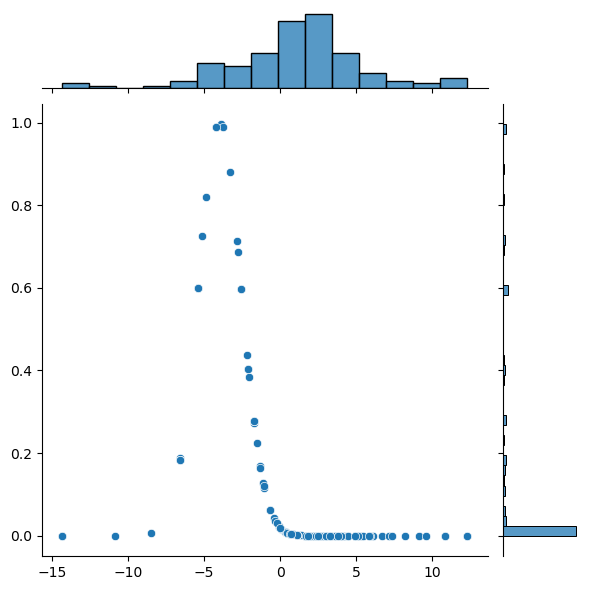

In [88]:
## this is one late
phenotypes1 = from_string_to_array(phenotypes1)
fitness1 = from_string_to_array(fitness1)
sns.jointplot(x =phenotypes1, y =fitness1 )

<AxesSubplot:ylabel='Count'>

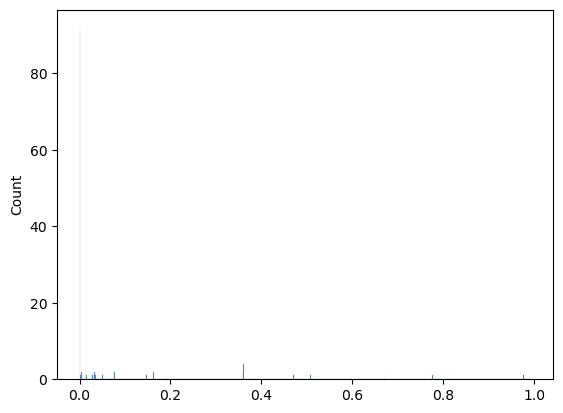

In [90]:
fit_repro = '0.00374316 0.0745027 2.27058e-11 1.63107e-19 2.06267e-10 1.13209e-05 1.16235e-25 0.0352514 0.977861 0.162669 3.78697e-10 7.41381e-18 1.60996e-10 1.88364e-58 1.04253e-10 9.13121e-10 9.19263e-08 3.45475e-16 0.000262982 1.2677e-06 7.66825e-18 1.20126e-18 0.190724 5.90197e-24 1.13209e-05 1.25749e-27 0.359815 2.33074e-06 1.51541e-07 4.96237e-05 9.63171e-23 3.59724e-08 1.51026e-08 2.47155e-05 0.357453 1.75698e-05 0.00374316 0.0161394 0.0134329 2.47978e-11 2.33374e-18 0.0287539 0.0773995 6.87865e-33 5.43314e-09 3.76612e-38 8.8595e-41 2.6197e-06 6.73453e-07 1.71683e-08 0.0501896 2.48584e-10 0.000439307 1.75698e-05 2.13276e-06 0.0335898 5.90197e-24 0.147468 3.08052e-15 6.20617e-09 0.0143174 1.60996e-10 0.00051372 2.33074e-06 0.524771 0.672614 9.5931e-05 0.00173747 1.27764e-48 1.04253e-10 4.96237e-05 9.19263e-08 5.08264e-09 1.84443e-08 0.992118 1.72605e-14 2.47978e-11 0.0773995 0.359815 6.63156e-11 5.18584e-22 5.75125e-20 0.977195 0.776764 1.53173e-11 1.71683e-08 2.95408e-10 1.56276e-28 2.71996e-12 0.162669 1.01511e-05 8.12047e-22 0.359815 1.96522e-12 2.55363e-11 2.80758e-13 2.6197e-06 0.50803 0.0269942 1.60483e-09 8.56082e-06 7.66825e-18 1.20126e-18 2.71996e-12 0.0335898 3.95991e-05 7.74715e-05 0.977861 0.00122732 0.000877221 4.03435e-16 1.27764e-48 0.000348857 0.357453 1.72605e-14 4.6865e-58 0.470716 3.95002e-08 0.359815 7.87526e-14 9.13121e-10 2.6197e-06 4.96237e-05 2.47155e-05 1.75698e-05 6.03165e-18'
fit_repro = from_string_to_array(fit_repro)
sns.histplot(fit_repro)

In [69]:
len(phenotypes2)

125

In [70]:
len(phenotypes1)

107

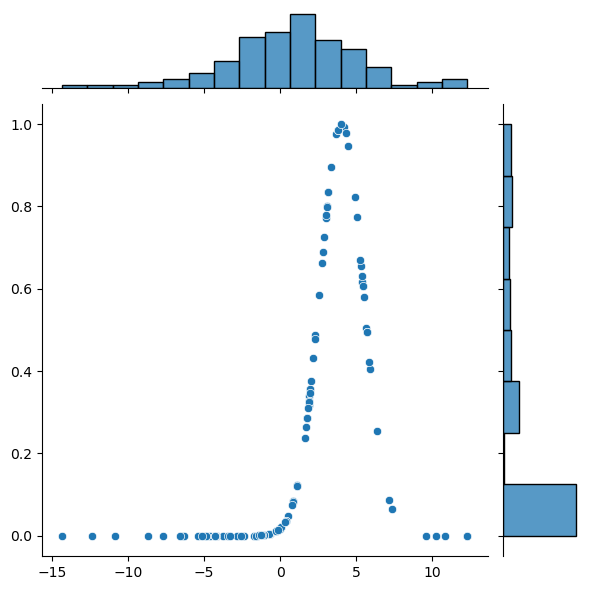

In [64]:
## this is 2 early 
phenotypes2 = from_string_to_array(phenotypes2)
fitness2 = from_string_to_array(fitness2)
sns.jointplot(x =phenotypes2, y =fitness2 )

In [ ]:
## by 2 late they all died

In [26]:
phen = '1.5098 -8.5026 12.2484 -1.7378 11.9632 -4.2116 -0.3386 2.9844 -3.7852 3.185 -3.053 -4.3164 0.112 8.4328 -3.8742 4.905 -1.2366 -1.5592 -1.721 -1.064 2.6786 1.839 -0.3386 1.9188 1.968 1.8878 2.4774 3.0012 -1.7378 -6.5866 11.9632 -3.95 -1.934 5.9006 3.9612 -1.5592 -1.9366 2.6786 4.1748 11.9632 0.3016 2.542 -1.5496 2.9844 -1.0786 -3.7852 2.9562 2.1802 2.6506 2.7292 1.5098 -1.721 -8.5026 5.3016 0.7726 11.9632 1.9664 0.6662 10.8512 1.9188 5.7572 -0.00979988 -1.2824 4.5474 4.4382 -3.8742 -6.3218 1.9414 -1.9942 1.7596 3.149 -0.6574 -1.934 5.6796 0.7954 1.5968 -0.108 -10.8464 -4.322 10.8512 2.78 5.9006 5.7572 1.6116 0.9172 -3.053 0.7726 0.0484 -8.5026 -3.3142 -0.7376 2.9844 4.5474 -1.3122 0.6061 2.364 -0.0848 -1.2888 -2.3768 -1.721 2.9886 1.7596 -4.2116 1.839 -6.8038 5.8552 -4.455 -0.248 -0.3964 5.413 2.1802 2.8498 -0.0679999'

<AxesSubplot:ylabel='Count'>

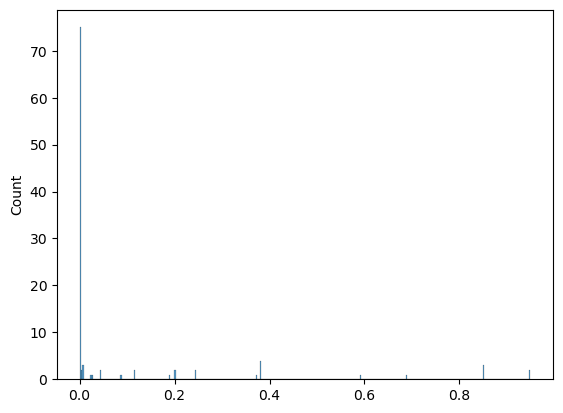

In [29]:
fitness_repr = from_string_to_array(fitness_repr)
sns.histplot(fitness_repr)

In [30]:
fitness_repr

array([3.81536e-01, 3.02604e-31, 6.31606e-13, 9.69557e-07, 9.11944e-10,
       2.27321e-38, 6.70558e-03, 3.80478e-01, 2.52410e-08, 1.51471e-05,
       3.81536e-01, 1.83914e-28, 5.46877e-03, 8.41903e-14, 1.13781e-08,
       3.65888e-38, 2.96480e-18, 2.28280e-10, 2.53692e-02, 2.42379e-01,
       3.81817e-18, 1.07879e-08, 4.18166e-43, 2.01732e-26, 1.05699e-04,
       4.36521e-02, 2.43007e-43, 7.74678e-36, 1.93562e-26, 8.49962e-01,
       5.92825e-01, 1.51881e-07, 1.90679e-21, 2.27321e-38, 8.60635e-02,
       3.80478e-01, 3.33867e-10, 5.62660e-17, 1.12799e-25, 2.49479e-29,
       4.36521e-02, 5.46877e-03, 1.13781e-08, 2.44671e-01, 9.69557e-07,
       1.39932e-11, 1.46969e-05, 2.19028e-24, 2.13352e-12, 3.08792e-14,
       6.77075e-04, 1.41053e-03, 3.71956e-01, 5.12158e-06, 1.83077e-05,
       2.02061e-01, 9.73436e-17, 7.93843e-06, 6.88257e-01, 1.88235e-01,
       2.96480e-18, 3.24549e-26, 2.24736e-08, 1.07879e-08, 1.48585e-14,
       2.04894e-10, 2.57987e-02, 5.12158e-06, 5.32245e-06, 2.430

In [31]:
fitness1

array([3.81536e-01, 3.02604e-31, 6.31606e-13, 9.69557e-07, 9.11944e-10,
       2.27321e-38, 6.70558e-03, 3.80478e-01, 2.52410e-08, 1.51471e-05,
       3.81536e-01, 1.83914e-28, 5.46877e-03, 8.41903e-14, 1.13781e-08,
       3.65888e-38, 2.96480e-18, 2.28280e-10, 2.53692e-02, 2.42379e-01,
       3.81817e-18, 1.07879e-08, 4.18166e-43, 2.01732e-26, 1.05699e-04,
       4.36521e-02, 2.43007e-43, 7.74678e-36, 1.93562e-26, 8.49962e-01,
       5.92825e-01, 1.51881e-07, 1.90679e-21, 2.27321e-38, 8.60635e-02,
       3.80478e-01, 3.33867e-10, 5.62660e-17, 1.12799e-25, 2.49479e-29,
       4.36521e-02, 5.46877e-03, 1.13781e-08, 2.44671e-01, 9.69557e-07,
       1.39932e-11, 1.46969e-05, 2.19028e-24, 2.13352e-12, 3.08792e-14,
       6.77075e-04, 1.41053e-03, 3.71956e-01, 5.12158e-06, 1.83077e-05,
       2.02061e-01, 9.73436e-17, 7.93843e-06, 6.88257e-01, 1.88235e-01,
       2.96480e-18, 3.24549e-26, 2.24736e-08, 1.07879e-08, 1.48585e-14,
       2.04894e-10, 2.57987e-02, 5.12158e-06, 5.32245e-06, 2.430

In [32]:
phenotypes1

array([ -4.6118,   5.8552,   1.4954,  -0.7376,   0.4522,   7.1664,
        -2.8362,  -7.3902,  -0.0848,  -1.2888,  -4.6118,   5.3016,
        -2.7724,   1.7596,   0.0484,   7.1302,   2.9844,   0.6634,
        -3.2892,  -4.3164,   2.9562,   0.0572,   7.97  ,   4.878 ,
        -1.721 ,  -8.5026,   8.0088,   6.7158,   4.8818,  -5.4298,
        -4.9774,  -0.3964,   3.7682,   7.1664,  -3.7852,  -7.3902,
         0.6061,   2.6506,   4.7186,   5.477 ,  -8.5026,  -2.7724,
         0.0484,  -4.322 ,  -0.7376,   1.07  ,  -1.2824,   4.4382,
         1.3312,   1.8878,  -2.1796,  -2.3768,  -7.4064,  -1.064 ,
        -1.3292,  -4.2116,   2.587 , -10.8464,  -5.1356,  -4.1724,
         2.9844,   4.8342,  -0.0652,   0.0572,   1.98  ,   0.6796,
        -8.7046,  -1.064 ,  -1.0718,   8.0088,   6.7158,  -4.2116,
         0.503 ,   5.8552,  -5.4298,   2.8908,  -0.4348,   5.3926,
         3.6028,   1.07  ,  -2.8362,  -1.721 ,  -3.9188,  12.2484,
         2.6786,   4.1748,  -0.248 ,   3.7682,   5.9006,   0.1

In [35]:
phen_afterrep = '-4.6118 5.8552 1.4954 -0.7376 0.4522 7.1664 -2.8362 -7.3902 -0.0848 -1.2888 -4.6118 5.3016 -2.7724 1.7596 0.0484 7.1302 2.9844 0.6634 -3.2892 -4.3164 2.9562 0.0572 7.97 4.878 -1.721 -8.5026 8.0088 6.7158 4.8818 -5.4298 -4.9774 -0.3964 3.7682 7.1664 -3.7852 -7.3902 0.6061 2.6506 4.7186 5.477 -8.5026 -2.7724 0.0484 -4.322 -0.7376 1.07 -1.2824 4.4382 1.3312 1.8878 -2.1796 -2.3768 -7.4064 -1.064 -1.3292 -4.2116 2.587 -10.8464 -5.1356 -4.1724 2.9844 4.8342 -0.0652 0.0572 1.98 0.6796 -8.7046 -1.064 -1.0718 8.0088 6.7158 -4.2116 0.503 5.8552 -5.4298 2.8908 -0.4348 5.3926 3.6028 1.07 -2.8362 -1.721 -3.9188 12.2484 2.6786 4.1748 -0.248 3.7682 5.9006 0.112 2.0216 -6.3218 1.5098 -3.9188 3.3594 -5.4298 0.6634 -2.8362 3.336 0.0604 0.8308 4.878 5.2648 -6.3218 -4.6118 -4.6118 -4.6118 -4.6118 -7.3902 -7.3902 -7.3902 -7.3902 -4.6118 -4.6118 -4.6118 -4.6118 -2.8026 -1.8184 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -4.9774 -4.9774 -4.9774 -4.9774 -3.9068 -4.9774 -7.3902 -7.3902 -7.3902 -7.3902 -4.322 -4.322 -7.4064 -7.4064 -7.4064 -4.2116 -4.2116 -5.1356 -5.1356 -5.1356 -5.1356 -5.1356 -5.1356 -5.1356 -4.1724 -4.2116 -4.2116 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -3.9188 -6.8454 -6.3218 -5.7982 -5.7982 -5.7982 -6.3218 -6.8454 -6.3218 -5.7982 -6.3218 -3.9188 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -5.4298 -6.3218 -0.9818 -5.7982 -5.7982 -2.3641 -6.3218 -5.7982 -5.7982 -5.7982 -5.7982'

In [37]:
len(phenotypes1)

104

In [36]:
len(phen_afterrep)

1449

<AxesSubplot:ylabel='Count'>

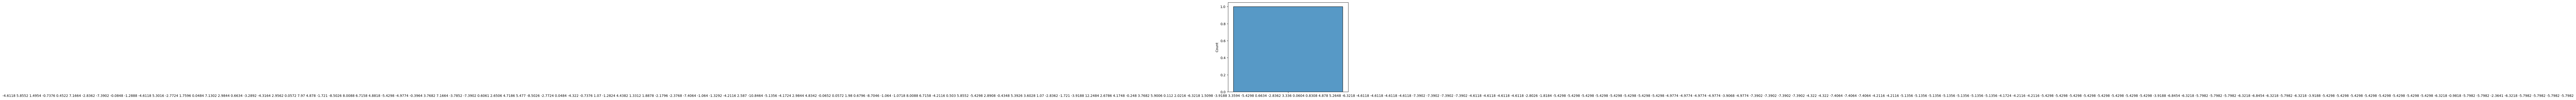

In [38]:
sns.histplot(phen_afterrep)

In [ ]:
0.381536 3.02604e-31 6.31606e-13 9.69557e-07 9.11944e-10 2.27321e-38 0.00670558 0.380478 2.5241e-08 1.51471e-05 0.381536 1.83914e-28 0.00546877 8.41903e-14 1.13781e-08 3.65888e-38 2.9648e-18 2.2828e-10 0.0253692 0.242379 3.81817e-18 1.07879e-08 4.18166e-43 2.01732e-26 0.000105699 0.0436521 2.43007e-43 7.74678e-36 1.93562e-26 0.849962 0.592825 1.51881e-07 1.90679e-21 2.27321e-38 0.0860635 0.380478 3.33867e-10 5.6266e-17 1.12799e-25 2.49479e-29 0.0436521 0.00546877 1.13781e-08 0.244671 9.69557e-07 1.39932e-11 1.46969e-05 2.19028e-24 2.13352e-12 3.08792e-14 0.000677075 0.00141053 0.371956 5.12158e-06 1.83077e-05 0.202061 9.73436e-17 7.93843e-06 0.688257 0.188235 2.9648e-18 3.24549e-26 2.24736e-08 1.07879e-08 1.48585e-14 2.04894e-10 0.0257987 5.12158e-06 5.32245e-06 2.43007e-43 7.74678e-36 0.202061 6.56233e-10 3.02604e-31 0.849962 6.84397e-18 1.88207e-07 6.54891e-29 9.46313e-21 1.39932e-11 0.00670558 0.000105699 0.11467 4.88741e-73 4.41451e-17 3.30746e-23 6.53995e-08 1.90679e-21 1.76473e-31 7.72911e-09 1.0652e-14 0.94954 5.66926e-13 0.11467 9.51165e-20 0.849962 2.2828e-10 0.00670558 1.18373e-19 1.05808e-08 7.37814e-11 2.01732e-26 2.78577e-28 0.94954 0.381536 0.381536 0.381536 0.381536 0.380478 0.380478 0.380478 0.380478 0.381536 0.381536 0.381536 0.381536 0.00602593 0.000159592 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.592825 0.592825 0.592825 0.592825 0.111834 0.592825 0.380478 0.380478 0.380478 0.380478 0.244671 0.244671 0.371956 0.371956 0.371956 0.202061 0.202061 0.688257 0.688257 0.688257 0.688257 0.688257 0.688257 0.688257 0.188235 0.202061 0.202061 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.11467 0.699527 0.94954 0.979844 0.979844 0.979844 0.94954 0.699527 0.94954 0.979844 0.94954 0.11467 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.849962 0.94954 3.40194e-06 0.979844 0.979844 0.00134699 0.94954 0.979844 0.979844 0.979844 0.979844

In [33]:
fitness1

array([3.81536e-01, 3.02604e-31, 6.31606e-13, 9.69557e-07, 9.11944e-10,
       2.27321e-38, 6.70558e-03, 3.80478e-01, 2.52410e-08, 1.51471e-05,
       3.81536e-01, 1.83914e-28, 5.46877e-03, 8.41903e-14, 1.13781e-08,
       3.65888e-38, 2.96480e-18, 2.28280e-10, 2.53692e-02, 2.42379e-01,
       3.81817e-18, 1.07879e-08, 4.18166e-43, 2.01732e-26, 1.05699e-04,
       4.36521e-02, 2.43007e-43, 7.74678e-36, 1.93562e-26, 8.49962e-01,
       5.92825e-01, 1.51881e-07, 1.90679e-21, 2.27321e-38, 8.60635e-02,
       3.80478e-01, 3.33867e-10, 5.62660e-17, 1.12799e-25, 2.49479e-29,
       4.36521e-02, 5.46877e-03, 1.13781e-08, 2.44671e-01, 9.69557e-07,
       1.39932e-11, 1.46969e-05, 2.19028e-24, 2.13352e-12, 3.08792e-14,
       6.77075e-04, 1.41053e-03, 3.71956e-01, 5.12158e-06, 1.83077e-05,
       2.02061e-01, 9.73436e-17, 7.93843e-06, 6.88257e-01, 1.88235e-01,
       2.96480e-18, 3.24549e-26, 2.24736e-08, 1.07879e-08, 1.48585e-14,
       2.04894e-10, 2.57987e-02, 5.12158e-06, 5.32245e-06, 2.430

In [66]:
selection_coef = pd.read_csv('selection_coef_qtl1_contrib.bed', sep = '\t',header = None)[3]

<AxesSubplot:xlabel='3', ylabel='Count'>

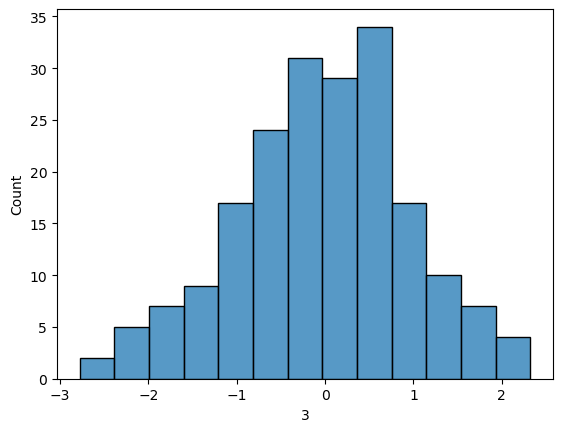

In [68]:
sns.histplot(selection_coef)

In [81]:
fitness_python = np.exp(-0.01*(np.array(phenotypes1 - (-4))**2))

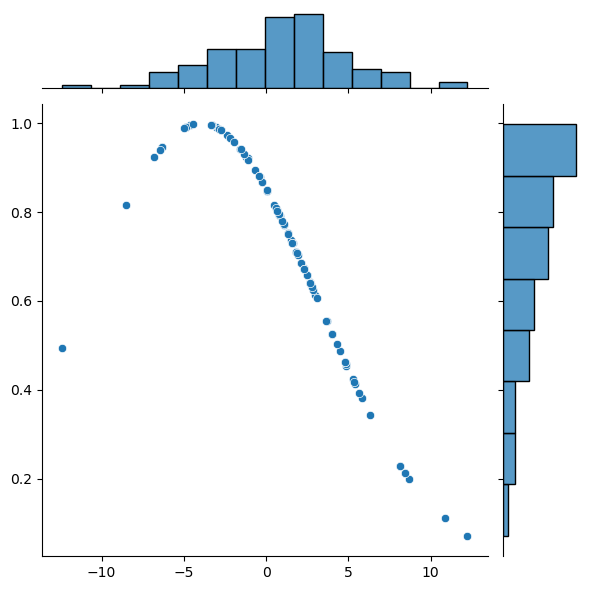

In [82]:
sns.jointplot(x =phenotypes1, y =fitness_python )

In [83]:
fitness_python = np.exp(-0.01*(np.array(phenotypes2 - (4))**2))

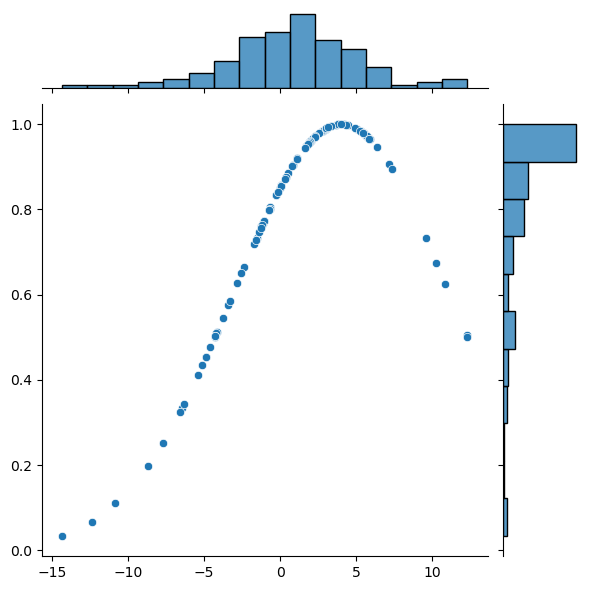

In [84]:
sns.jointplot(x =phenotypes2, y =fitness_python )

In [93]:
np.exp(-0.1*(np.array(-3.4345 - (-6))**2))

0.5177933652974879

In [ ]:
fitness = exp(-0.1 * (phenotype - (individual.subpopulation.tag))^2);


In [6]:
phenotypes1 = from_string_to_array(phenotypes1)


In [7]:
phenotypes1

array([2.1802, 3.0572, 1.4954, 3.336 , 2.865 , 2.865 , 1.968 , 2.6246,
       2.7292, 1.839 , 1.9188, 1.3236, 0.9756, 2.78  , 1.968 , 1.9188,
       1.9188, 1.3312, 2.5907, 2.6246, 1.839 , 2.7156, 2.6506, 2.6506,
       2.6246, 2.6246, 2.6506, 1.8878, 1.8878, 0.7954, 1.9664, 2.6246,
       2.1802, 1.9188, 1.9188, 2.78  , 1.9188, 2.6246, 1.839 , 2.1802,
       1.9188, 1.968 , 2.6704, 2.1802, 2.6246, 1.4954, 2.1802, 2.6246,
       2.6246, 2.6246, 2.6246, 2.6246, 2.6246, 2.7292, 1.9664, 1.839 ,
       1.9664, 1.9664, 1.9664, 1.9664, 1.9664, 1.9664, 3.071 , 1.968 ,
       2.1802, 1.839 , 1.4954, 1.839 , 1.839 , 1.839 , 1.839 , 0.8308,
       1.4954, 1.968 , 1.839 , 2.1802, 1.968 , 2.6704, 1.8878, 2.6704,
       1.968 , 1.968 , 1.968 , 1.839 , 1.7071, 3.0012, 1.968 , 1.9188,
       1.8878, 1.8878, 1.4954, 1.4954, 1.4954, 1.8878, 1.9664, 1.968 ,
       1.3236, 1.3236, 1.839 , 2.78  , 0.8308, 1.9664, 0.8308, 2.78  ,
       1.9188, 2.78  , 1.9188, 0.8308, 0.8308, 1.968 , 1.968 , 1.839 ,
      

In [11]:
type_ecotypes = pd.Series(phenotypes1).value_counts().reset_index()

<AxesSubplot:xlabel='index', ylabel='0'>

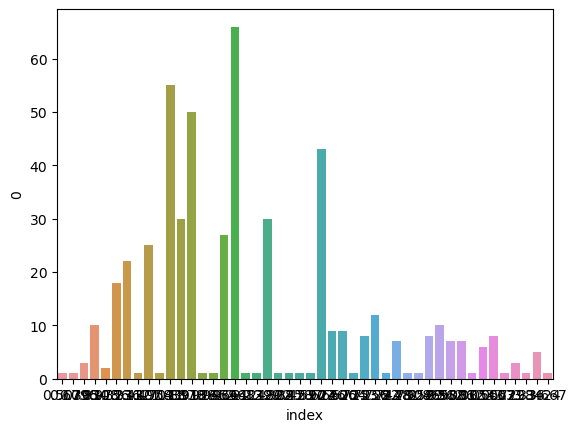

In [14]:
sns.barplot(data = type_ecotypes, x = 'index', y = 0)

In [16]:
len(type_ecotypes)

46

In [ ]:
vcf = allel.read_vcf('vcf_slim/subp0.vcf')

genotypes = allel.GenotypeArray(vcf['calldata/GT'])
genotypes.count_alleles()[:, 1]
genotypes

In [ ]:
genotypes.count_alleles()

<AlleleCountsArray shape=(4698, 2) dtype=int32>
 79 921
387 613
143 857
...
 103  897
 898  102
   0 1000

In [ ]:
tengo una gran duda y es queveo que los vcf files de las subp de slim tienen hasat 5 mil snps y no estaria entenideo porque, creo que esto se debe a qeu en los vcf files solo se muetran los sitios variantes 


In [ ]:
ref_allele_counts = genotypes.count_alleles()[:, 0]
alt_allele_counts = genotypes.count_alleles()[:, 1]

In [ ]:
## there is no snp with all of the ref allele, this might mean that if that is the case, then it is not written in the vcf
## as a way of save memory 

ref_allele_counts[ref_allele_counts == 1000]

array([], dtype=int32)

In [ ]:
ref_allele_counts[ref_allele_counts == 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
#lets check this in the original vcf 
vcf_og = allel.read_vcf('qtl1_neutral.vcf')
genotypes_og = allel.GenotypeArray(vcf_og['calldata/GT'])
ref_allele_counts_og = genotypes_og.count_alleles()[:, 0]
alt_allele_counts_og = genotypes_og.count_alleles()[:, 1]

In [ ]:
ref_allele_counts_og[ref_allele_counts_og == 1000]

array([], dtype=int32)

In [ ]:
ref_allele_counts_og[ref_allele_counts_og == 0]

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)